# Introduction to cf-python and cf-plot

----

## The "cf" in cf-python and cf-plot are to indicate that they are underpined by CF (Climate and Forecast) Metadata Conventions:

## http://cfconventions.org

----

## cf-python - The Python cf package implements the CF data model for the reading, writing and processing of data and metadata:

## https://ncas-cms.github.io/cf-python

----

## cf-plot - A set of Python routines for making the common contour, vector and line plots that climate researchers use. can also plot NumPy arrays of data:

## http://ajheaps.github.io/cf-plot

----

# Read, select, write example

In [27]:
# Inline images in Ipython Notebook - not needed in a terminal Python session.
%matplotlib inline

In [28]:
# Import cf-python and cf-plot
import cf
import cfplot as cfp

In [29]:
# Read a data file
fl = cf.read('ncas_data/data1.nc')

In [30]:
# View the contents of the file
fl

[<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

In [31]:
# Select the air temperature
temp = fl.select('air_temperature')[0]
temp

<CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>

In [32]:
# Select by index
temp = fl[1]
temp

<CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>

In [33]:
print(temp)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [34]:
# Select by long_name
vorticity = fl.select('long_name=Potential vorticity')[0]

In [35]:
# See a longer list of field contents
print(vorticity)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [36]:
# Set the standard_name of the field
vorticity.standard_name = 'ertel_potential_vorticity'

# Look at field contents
print(vorticity)

Field: ertel_potential_vorticity (ncvar%PV)
-------------------------------------------
Data            : ertel_potential_vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [37]:
# Write the modified field to a netCDF file
cf.write(vorticity, 'newfile.nc')

# Contour plots

In [38]:
# Use subspace to select the temperature at 500mb
t_500 = temp.subspace(pressure=500)
print(t_500)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(1), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(1) = [500.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


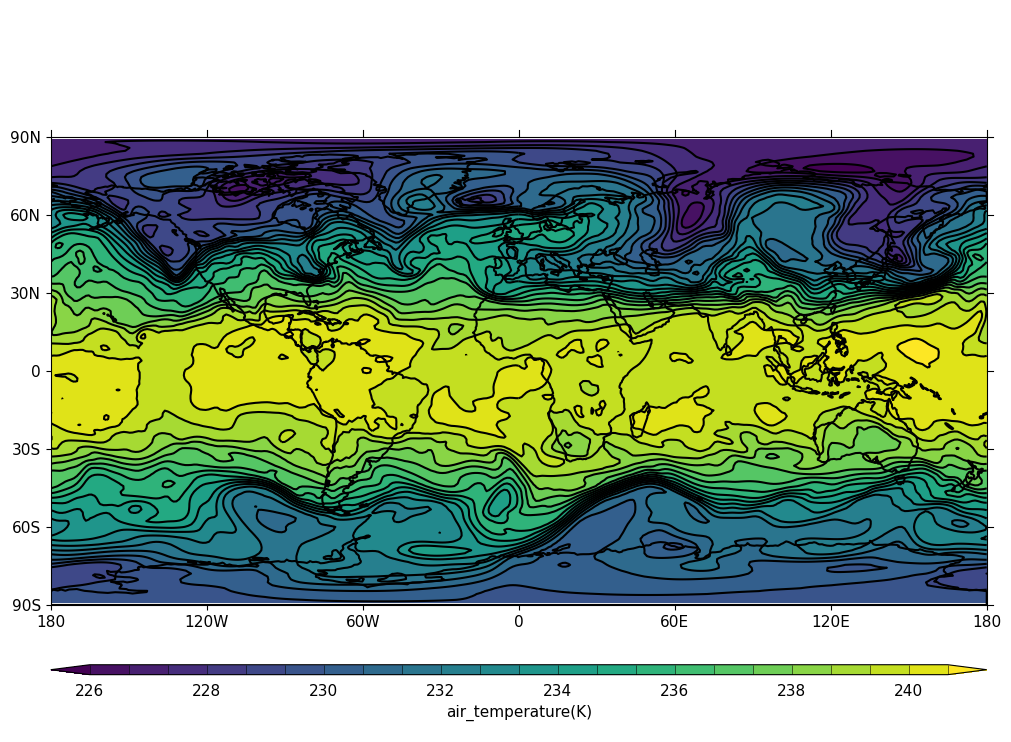

In [39]:
# Make a contour plot of the data
cfp.con(t_500)

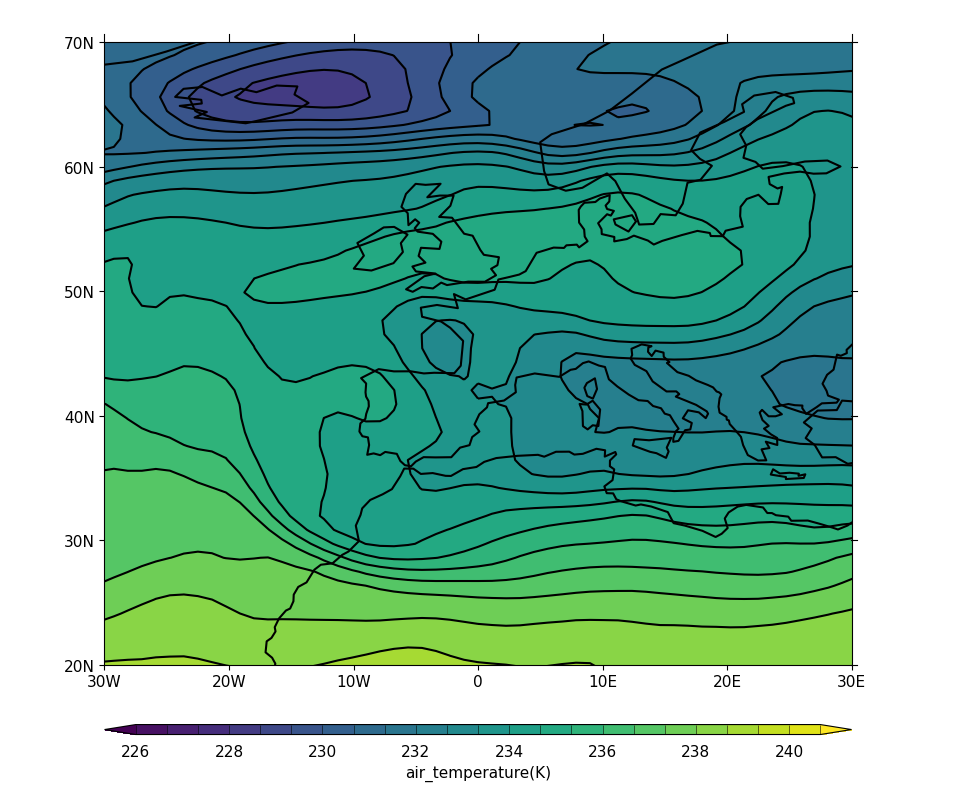

In [40]:
# Use mapset to select Europe and make a new contour plot
cfp.mapset(lonmin=-30, lonmax=30, latmin=20, latmax=70)
cfp.con(t_500)

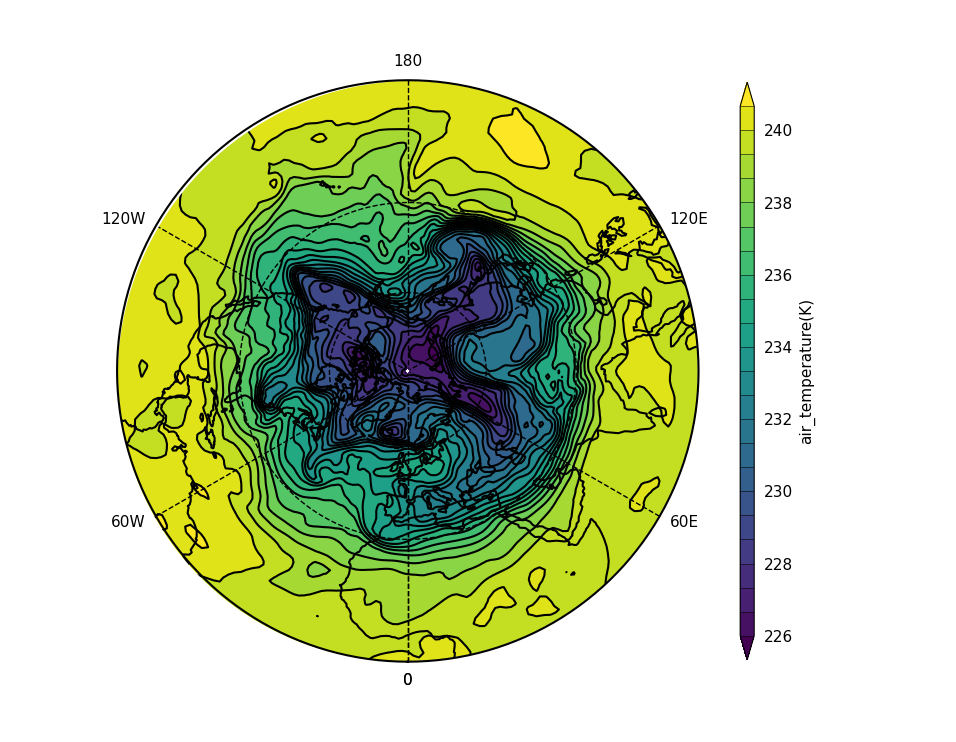

In [41]:
# Make a Northern Hemiphere polar stereographic plot
cfp.mapset(proj='npstere')
cfp.con(t_500)

In [42]:
# Reset mapping
cfp.mapset()

In [43]:
# Select the zonal wind and make a zonal mean of this using the collapse function in cf-python
u = fl.select('eastward_wind')[0]
u_mean = u.collapse('longitude: mean')
print(u_mean)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(1)) m s**-1
Cell methods    : longitude(1): mean
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(1) = [179.4375] degrees_east


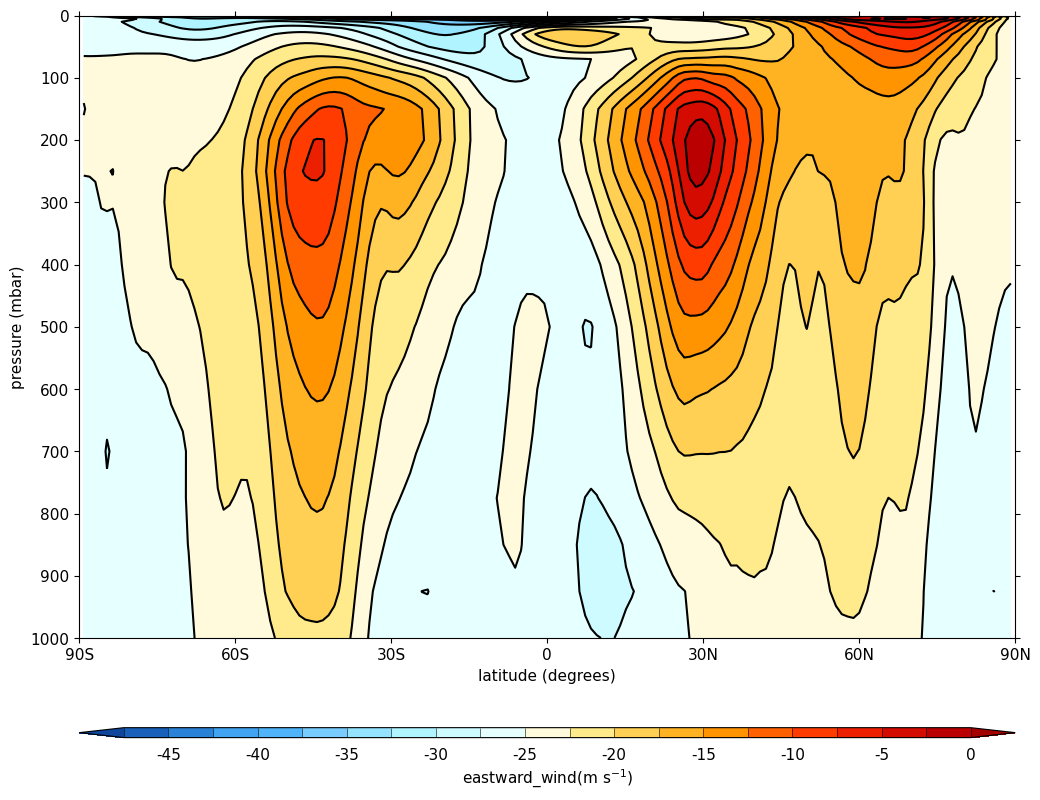

In [44]:
# Make a zonal mean zonal wind plot
cfp.con(u_mean)

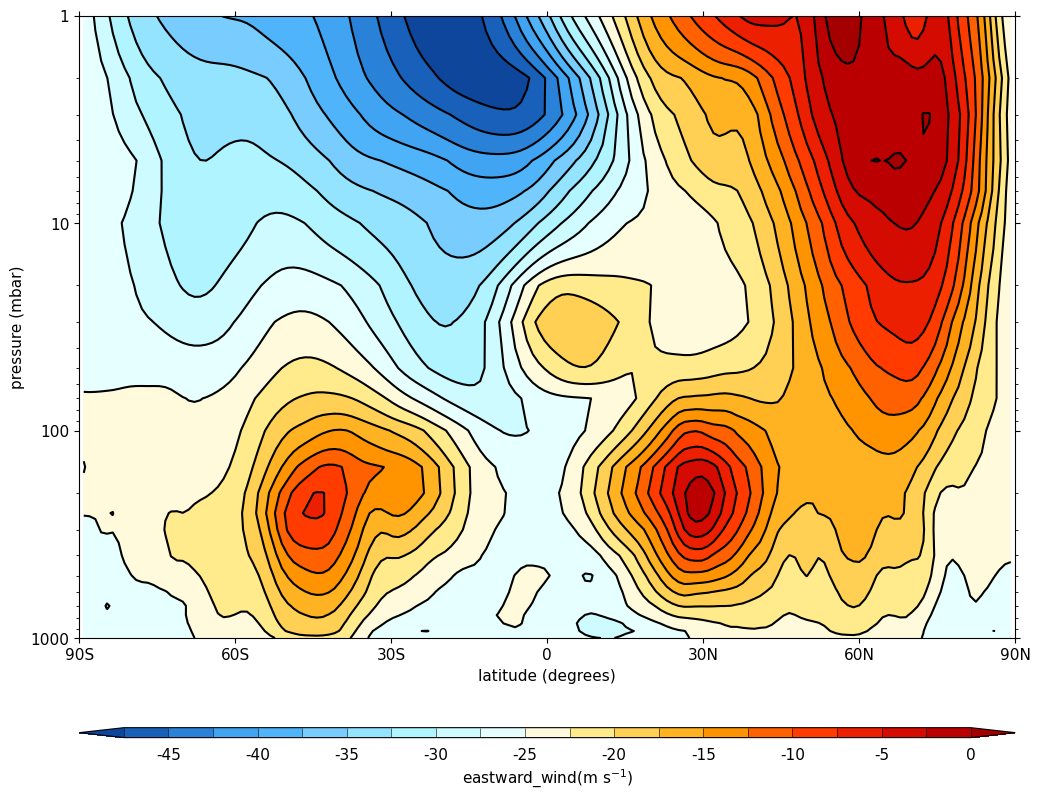

In [45]:
# Make a log y-axis plot of the zonal mean zonal wind
cfp.con(u_mean, ylog=True)

# Vector plots

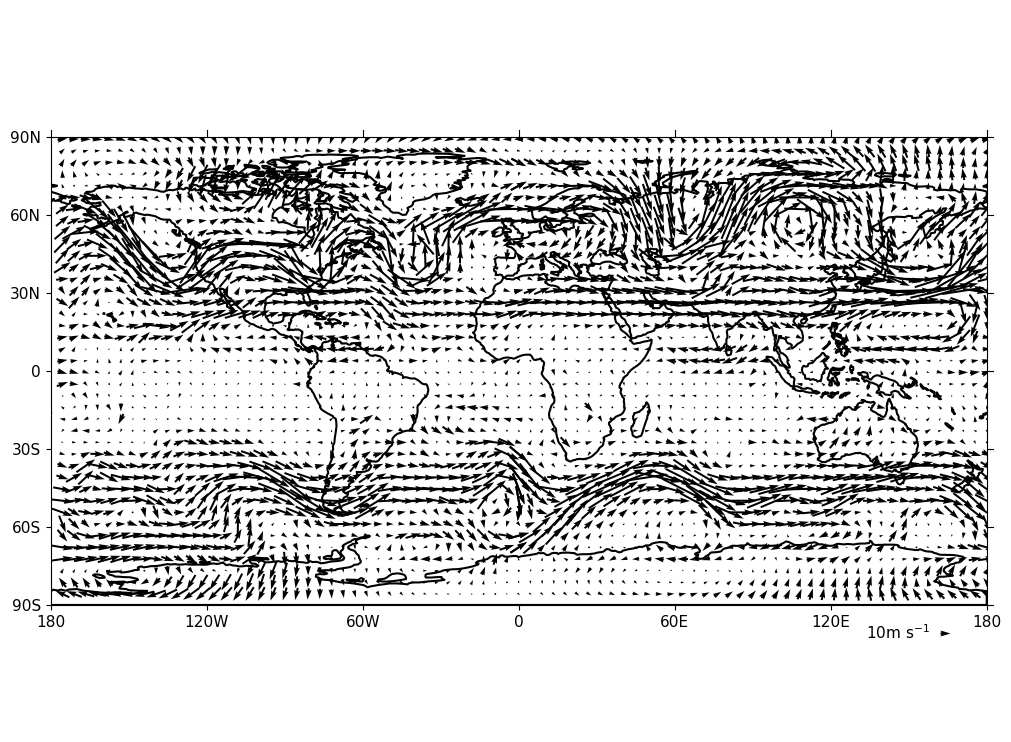

In [46]:
# Select u and v wind components at 500mb and make a vector plot
# We use a stride of 4 in plotting the vectors as the points are close together
u = fl.select('eastward_wind')[0].subspace(pressure=500)
v = fl.select('northward_wind')[0].subspace(pressure=500)
cfp.vect(u=u, v=v, key_length=10, scale=100, stride=4)

# Line plots

In [47]:
# Select the zonal mean zonal wind at 100mb
u = fl.select('eastward_wind')[0]
u_mean = u.collapse('longitude: mean')
u_mean_100 = u_mean.subspace(pressure=100)

print(u_mean_100)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(1), latitude(160), longitude(1)) m s**-1
Cell methods    : longitude(1): mean
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(1) = [100.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(1) = [179.4375] degrees_east


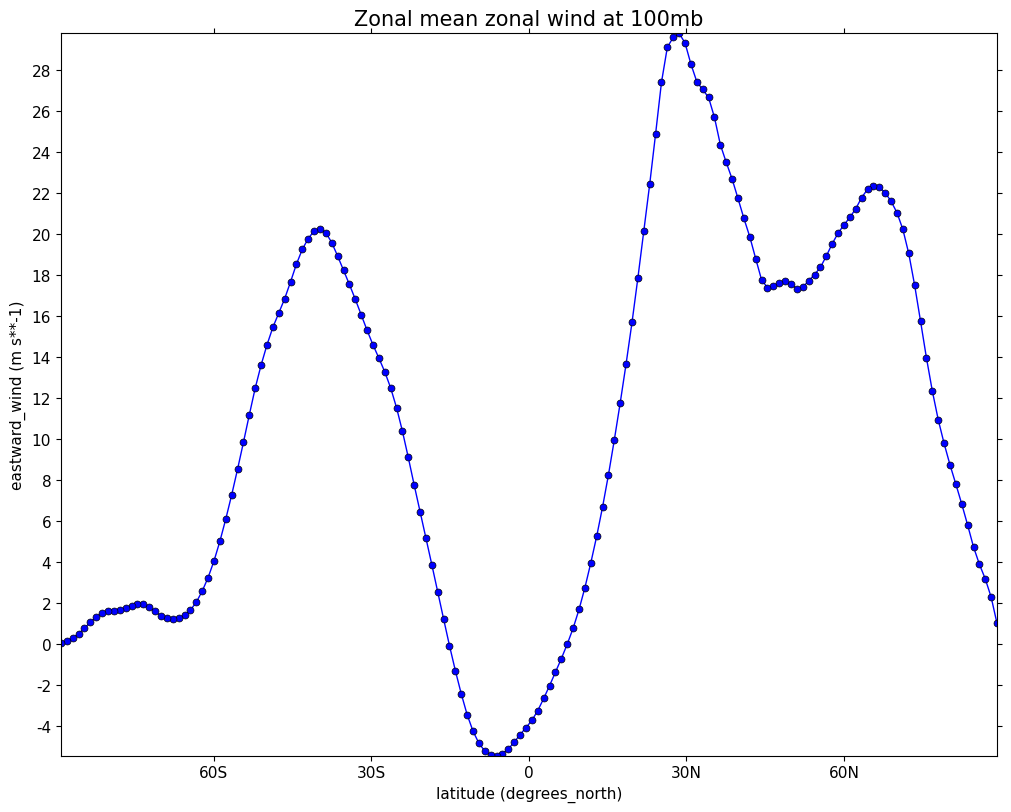

In [48]:
cfp.lineplot(u_mean_100, marker='o', color='blue', title='Zonal mean zonal wind at 100mb')

# Regridding
Regrid some temperature longitude-latitude data to another grid and make a plot of the difference between the two datsets.

In [49]:
# Read in data on two different grids
temp_era40 = cf.read('ncas_data/data2.nc')[0]
temp_era_in = cf.read('ncas_data/data3.nc')[0]

print(temp_era40)
print(temp_era_in)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : long_name=latitude(256) = [89.46294403076172, ..., -89.46294403076172] degrees_north
                : long_name=longitude(512) = [0.0, ..., 359.296875] degrees_east


In [50]:
# Perform the regridding
temp_regrid = temp_era_in.regrids(temp_era40, method='bilinear')

In [51]:
# Check the resolution of the regridded output
print(temp_regrid)

Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K
Dimension coords: long_name=t(1) = [1981-01-21 00:00:00]
                : long_name=p(1) = [1000.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


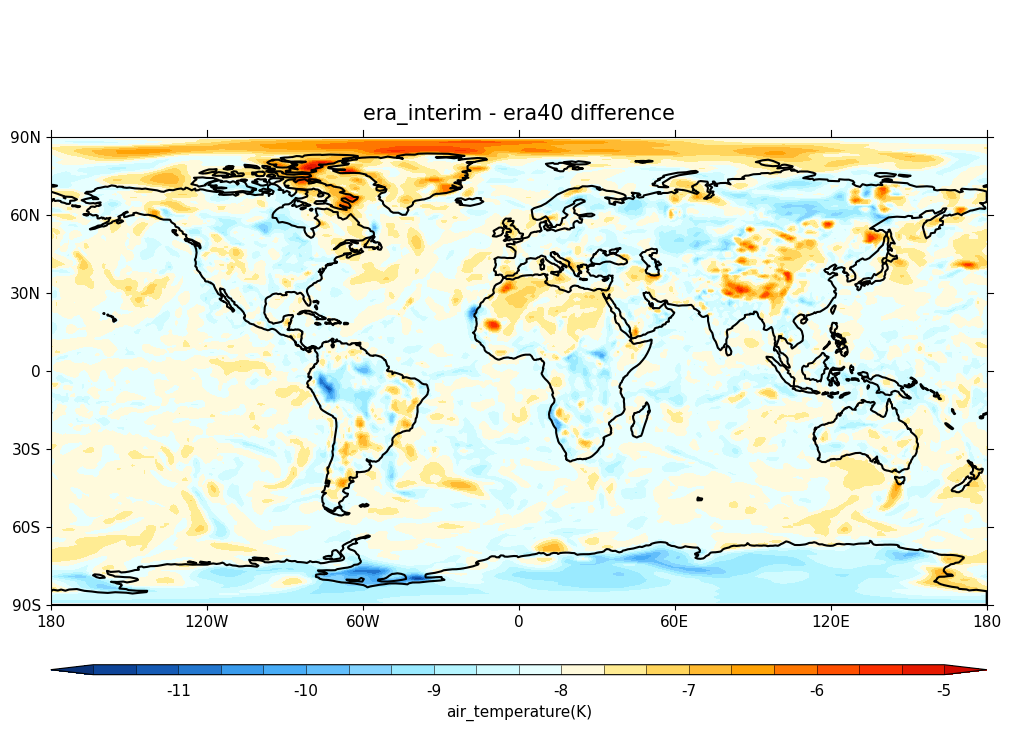

In [52]:
# Make a contour plot of the difference between the two datasets
cfp.con(temp_regrid - temp_era40, lines=False, title='era_interim - era40 difference')

## cf-plot gallery: http://ajheaps.github.io/cf-plot/gallery.html

## cf-python functionality: https://ncas-cms.github.io/cf-python

* ### read field constructs from netCDF, CDL, PP and UM datasets,

* ### create new field constructs in memory,

* ### inspect field constructs,

* ### test whether two field constructs are the same,

* ### modify field construct metadata and data,

* ### create subspaces of field constructs,

* ### write field constructs to netCDF datasets on disk,

* ### incorporate, and create, metadata stored in external files,

* ### read, write, and create data that have been compressed by convention (i.e. ragged or gathered arrays), whilst presenting a view of the data in its uncompressed form,

* ### read, write, and create coordinates defined by geometry cells,

* ### read netCDF and CDL datasets containing hierarchical groups,

* ### combine field constructs arithmetically,

* ### manipulate field construct data by arithmetical and trigonometrical operations,

* ### perform statistical collapses on field constructs,

* ### perform histogram, percentile and binning operations on field constructs,

* ### regrid field constructs with (multi-)linear, nearest neighbour, first- and second-order conservative and higher order patch recovery methods,

* ### apply convolution filters to field constructs,

* ### create moving means from field constructs,

* ### calculate derivatives of field constructs,

* ### create field constructs to create derived quantities (such as vorticity).